## ADA Project Milestone 2

### 0. Data acquiring and loading


In [164]:
import gdown
url = 'https://drive.google.com/drive/folders/1PrgCkFkrxCITerLQ8ur3WA1gH3CHOwak?usp=sharing'
gdown.download_folder(url, quiet=False)

Retrieving folder list


Processing file 1iOPOPu4frf1I4Jf4uTayOZOp5hVMrmTT corenlp_plot_summaries.tar
Retrieving folder 1ccwIHOyrDgoKT_3EH22HRMbewrHHOEcl MovieSummaries
Processing file 1zu2VUIpkFp0I3kr46TvGC63kfF9s_JIj character.metadata.tsv
Processing file 1PN9c77RArklfmOujI33p6wluEa_dN96x movie.metadata.tsv
Processing file 1m6w7mY9S0bOvtz-kTGo-B8YkGjskb0Ef name.clusters.txt
Processing file 1nIt_QHqCcxMiH2vbFolmqpo1LyVkPZlI plot_summaries.txt
Processing file 1UdukJlMW9MoX4IHdkaOIpReuB0vRvppq README.txt
Processing file 1uGhFD6c59a6Oixk1eUF1wlUyzcYnfyOR tvtropes.clusters.txt
Retrieving folder 1ZQpGCssrjVwZshqbaUfkKP5Wg_yeYVbn OurData
Processing file 1zJxQWM-jZ43J0QH84KFR7sSf10_EehBN CPI.csv
Processing file 1WuB-pGowH6ni1X_gLdX6aFp79ieIFomD details_imdb_sample.csv
Processing file 1UI9yPapQhs2qmv7rrMEhnUr0lucVB0L- details_tmdb_u.csv
Processing file 13PycCQQTawCBf3z-RuSfxyhF-lWPZHtm READMEmvs.txt
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1iOPOPu4frf1I4Jf4uTayOZOp5hVMrmTT
To: /content/ADAProjecData/corenlp_plot_summaries.tar
100%|██████████| 658M/658M [00:03<00:00, 197MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zu2VUIpkFp0I3kr46TvGC63kfF9s_JIj
To: /content/ADAProjecData/MovieSummaries/character.metadata.tsv
100%|██████████| 41.5M/41.5M [00:00<00:00, 140MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PN9c77RArklfmOujI33p6wluEa_dN96x
To: /content/ADAProjecData/MovieSummaries/movie.metadata.tsv
100%|██████████| 16.3M/16.3M [00:00<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m6w7mY9S0bOvtz-kTGo-B8YkGjskb0Ef
To: /content/ADAProjecData/MovieSummaries/name.clusters.txt
100%|██████████| 65.4k/65.4k [00:00<00:00, 45.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nIt_QHqCcxMiH2vbFolmqpo1LyVkPZlI
To: /content/ADAProjecData/MovieSummaries/plot_summaries.txt


['/content/ADAProjecData/corenlp_plot_summaries.tar',
 '/content/ADAProjecData/MovieSummaries/character.metadata.tsv',
 '/content/ADAProjecData/MovieSummaries/movie.metadata.tsv',
 '/content/ADAProjecData/MovieSummaries/name.clusters.txt',
 '/content/ADAProjecData/MovieSummaries/plot_summaries.txt',
 '/content/ADAProjecData/MovieSummaries/README.txt',
 '/content/ADAProjecData/MovieSummaries/tvtropes.clusters.txt',
 '/content/ADAProjecData/OurData/CPI.csv',
 '/content/ADAProjecData/OurData/details_imdb_sample.csv',
 '/content/ADAProjecData/OurData/details_tmdb_u.csv',
 '/content/ADAProjecData/READMEmvs.txt']

### 1. Data cleaning, augmentation and initial preprocessing

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = '/content/ADAProjecData/'
movie_metadata_fn = 'MovieSummaries/movie.metadata.tsv'
plot_summaries_fn = 'MovieSummaries/plot_summaries.txt'
character_metadata_fn = 'MovieSummaries/character.metadata.tsv'

CPI_values = 'OurData/CPI.csv'
tmdb_data_fn = 'OurData/details_tmdb_u.csv'              # movie list with details downloaded from TMDB as mentioned in the readme
imdb_data_sample_fn = 'OurData/details_imdb_sample.csv'  # data downloaded from IMDb based on TMDB list as mentioned in the readme


In [166]:
# load used dfs
movie_meta_orig = pd.read_csv(data_folder+movie_metadata_fn, sep='\t', header=None)
movie_sums_orig = pd.read_csv(data_folder+plot_summaries_fn, sep='\t', header=None)

imdb_data = pd.read_csv(data_folder+imdb_data_sample_fn)
tmdb_data = pd.read_csv(data_folder+tmdb_data_fn)

In [167]:
movie_meta_orig.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [168]:
movie_sums_orig.head()

,0,1
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [169]:
# lets merge the dataframes to have only the movies with summaries
movie_df_orig = movie_meta_orig.merge(movie_sums_orig, on=0)

In [170]:
print(movie_meta_orig.shape[0], movie_sums_orig.shape[0],movie_df_orig.shape[0] )

81741 42303 42204


In [171]:
# total movies with revenues
movie_df_orig[4].notna().sum()

7587

In [172]:
#remove mistake in date of one movie
movie_df_orig.at[32434, 3] = pd.to_datetime('2010') 

In [173]:
# drop columns which are not needed
movie_df_orig= movie_df_orig[[2,3,4,'1_y']]

In [174]:
# rename columns
movie_df_orig.columns = ['name', 'r_date', 'revenue', 'plot']
movie_df_orig.head()


,name,r_date,revenue,plot
0,Ghosts of Mars,2001-08-24,14010832.0,"Set in the second half of the 22nd century, th..."
1,White Of The Eye,1987,NaN,A series of murders of rich young women throug...
2,A Woman in Flames,1983,NaN,"Eva, an upper class housewife, becomes frustra..."
3,The Sorcerer's Apprentice,2002,NaN,"Every hundred years, the evil Morgana returns..."
4,Little city,1997-04-04,NaN,"Adam, a San Francisco-based artist who works a..."


In [175]:
movie_df_orig['r_date'] = pd.to_datetime(movie_df_orig['r_date'])

Text(0, 0.5, 'num_movies')

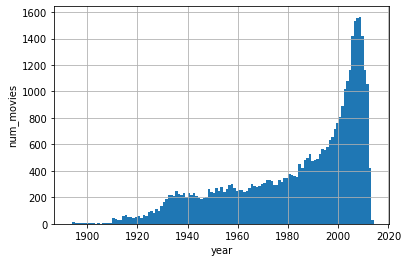

In [176]:
# distribution of movies in years
movie_df_orig['r_date'].dropna().hist(bins=movie_df_orig['r_date'].dropna().max().year - movie_df_orig['r_date'].dropna().min().year)
plt.xlabel('year')
plt.ylabel('num_movies')

Text(0, 0.5, 'num_movies')

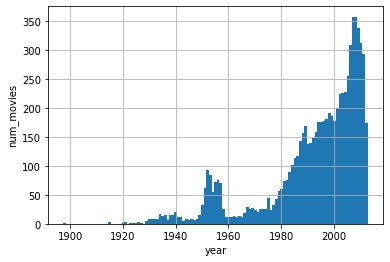

In [177]:
#distribution of movies with revenues in years
movie_df_plt = movie_df_orig[movie_df_orig['revenue'].notna()]
movie_df_plt['r_date'].dropna().hist(bins=movie_df_plt['r_date'].dropna().max().year - movie_df_plt['r_date'].dropna().min().year)
plt.xlabel('year')
plt.ylabel('num_movies')

In [178]:
# show plot summary lengths description
movie_df_orig['plot'].dropna().apply(lambda x: len(x.split(' '))).describe()

count    42204.000000
mean       312.223225
std        319.246837
min          4.000000
25%         88.000000
50%        188.000000
75%        455.000000
max       4942.000000
Name: plot, dtype: float64

In [179]:
tmdb_data.head()

,Unnamed: 0,tmdb_id,r_date,imdb_id,runtime,revenue,budget,tmdb_plot,tmdb_certs
0,176119,2,1988-10-21,tt0094675,73.0,0.0,0.0,Taisto Kasurinen is a Finnish coal miner whose...,"[{'iso_3166_1': 'FR', 'release_dates': [{'cert..."
1,185208,3,1986-10-17,tt0092149,74.0,0.0,0.0,"An episode in the life of Nikander, a garbage ...","[{'iso_3166_1': 'US', 'release_dates': [{'cert..."
2,244929,5,1995-12-09,tt0113101,98.0,4257354.0,4000000.0,It's Ted the Bellhop's first night on the job....,"[{'iso_3166_1': 'FI', 'release_dates': [{'cert..."
3,245609,6,1993-10-15,tt0107286,109.0,12136938.0,21000000.0,"While racing to a boxing match, Frank, Mike, J...","[{'iso_3166_1': 'HU', 'release_dates': [{'cert..."
4,420448,8,2006-01-01,tt0825671,80.0,0.0,42000.0,Timo Novotny labels his new project an experim...,"[{'iso_3166_1': 'LV', 'release_dates': [{'cert..."


In [180]:
# total movies with revenues
(tmdb_data['revenue'] >0).sum()

# we can see that number of available revenues is higher

14623

In [181]:
tmdb_data['r_date'] = pd.to_datetime(tmdb_data['r_date'])

Text(0, 0.5, 'num_movies')

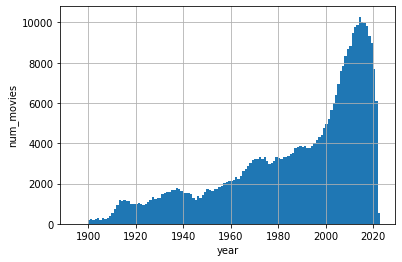

In [182]:
# distribution of movies in years
tmdb_data['r_date'].dropna().hist(bins=tmdb_data['r_date'].dropna().max().year - tmdb_data['r_date'].dropna().min().year)
plt.xlabel('year')
plt.ylabel('num_movies')

#number of available movies in all years is higher as well

Text(0, 0.5, 'num_movies')

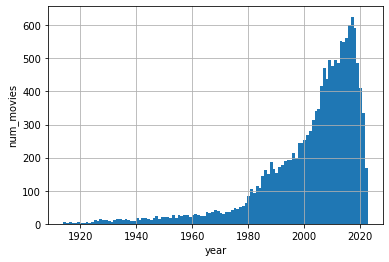

In [183]:
movie_tmdb_rev = tmdb_data[tmdb_data['revenue']>0]
movie_tmdb_rev['r_date'].dropna().hist(bins=movie_tmdb_rev['r_date'].dropna().max().year - movie_tmdb_rev['r_date'].dropna().min().year)
plt.xlabel('year')
plt.ylabel('num_movies')

#this distribution shows that we have more revenue data as well, but we are missing the peak around 1960, so merging the data would be the best

In [184]:
tmdb_data['tmdb_plot'].dropna().apply(lambda x: len(x.split(' '))).describe()

# we can see, that the tmbd plot data are way shorter than the ones provided in CMU summary, that's the reason, why we are downloading also the IMDB data, where are more plot alternatives and synapsis offered

count    334137.000000
mean         47.101497
std          34.746946
min           1.000000
25%          21.000000
50%          37.000000
75%          65.000000
max         214.000000
Name: tmdb_plot, dtype: float64

In [185]:
# IMPORTANT: of the IMdB data we have only a small sample, because the data getting is very time-consuming, so the following results are mainly for the old data, so it is very skewed

imdb_data.head()

,Unnamed: 0,imdb_id,title,rating,votes,genres,plot_outline,plot,synopsis,certs
0,0,tt0135453,The One-Man Band,7.0,2330,"['Short', 'Comedy']","Ladies and gentlemen, tonight for your enterta...",['A band-leader assembles an orchestra by myst...,NaN,"['Norway:A::(recommended rating)', 'United Kin..."
1,0,tt0000304,Grandma's Reading Glass,6.1,1195,"['Short', 'Family']",Demonstrating the brand-new technique of close...,['A boy looks through glasses at various objec...,NaN,"['Norway:A::(recommended rating)', 'United Kin..."
2,0,tt0000300,The Enchanted Drawing,6.9,1265,"['Animation', 'Short', 'Comedy', 'Fantasy']",An easel holds a sketch pad upon which Blackto...,['A cartoonist defies reality when he draws ob...,NaN,['Norway:A::(recommended rating)']
3,0,tt0132251,Joan of Arc,6.6,1240,"['Short', 'Drama', 'History']","Miraculously salvaged in 1982, this grand hand...",['A divinely inspired peasant woman becomes an...,NaN,"['Norway:A::(recommended rating)', 'United Sta..."
4,0,tt0291476,Sherlock Holmes Baffled,5.2,696,"['Short', 'Comedy', 'Crime', 'Fantasy', 'Myste...",Sherlock Holmes enters his drawing room to fin...,['Sherlock Holmes enters his drawing room to f...,NaN,['United States:Not Rated']


In [186]:
imdb_data['synopsis'].dropna().apply(lambda x: len(x.split(' '))).describe()

# the synopsis data are generally quite long,

count     1868.000000
mean       757.533191
std       1046.089867
min          5.000000
25%        255.750000
50%        491.000000
75%        821.000000
max      10593.000000
Name: synopsis, dtype: float64

In [187]:
imdb_data['plot'].dropna().apply(lambda x: len(x.split(' '))).describe()

# the plot data are way more frequent in the df then synopsis data, but the avg length is smaller and it is often merge of several alternative plots - which we can nicely analyze for sentiment as well!

count    37902.000000
mean       129.420954
std        295.738896
min          3.000000
25%         31.000000
50%         73.000000
75%        153.000000
max      16856.000000
Name: plot, dtype: float64

In [188]:
# downloaded revenue data
CPI_df = pd.read_csv(data_folder + CPI_values, sep = ',', index_col=0) 
CPI_df.head()

,year,value
0,1913,9.883333
1,1914,10.016667
2,1915,10.108333
3,1916,10.883333
4,1917,12.825000


In [189]:
#convert it to dict to make it faster
CPI = {}
for i in range(CPI_df.shape[0]):
  CPI[int(CPI_df.iloc[i]['year'])] = CPI_df.iloc[i]['value']

In [190]:
def calculate_inflation(df):
    
    # This function takes a dataframe as an argument and searches the colums "year" and "revenue".
    # If "revenue" is nan, it fills it with 0.
    # The function makes a new column "unfinlated_revenue" where are the unfinlated revenues.
    # The oldest CPI is from 1913 so if the film is made before that, the uninflated revenue will be 0. 
    # The CPI data is from https://www.bls.gov/cpi/data.htm
    
    uninflated_list = []
    CPI_today = CPI[2022]
    df["revenue"].fillna(0, inplace=True)
    for i, row in enumerate(df["year"]):
        if isinstance(row, str) :
            date = row.split("-")[0]
        date = int(row)
        if date >= 1913:
            CPI_year = CPI[date]
            USD_revenue = df.iloc[i]["revenue"]
            today_value = (CPI_today / CPI_year) * USD_revenue
            uninflated_list.append(today_value)
        else:
            uninflated_list.append(0)
    df["uninflated_revenue"] = uninflated_list

In [191]:
# create year column to make uninflating of revenues easier
movie_tmdb_rev["year"] = movie_tmdb_rev.apply(lambda x: x["r_date"].year, axis=1)
movie_tmdb_rev = movie_tmdb_rev[movie_tmdb_rev.year.notna()]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
calculate_inflation(movie_tmdb_rev)

In [193]:
# group revenues by year and average it
revs = movie_tmdb_rev.groupby(["year"]).revenue.mean()
uninf_revs = movie_tmdb_rev.groupby(["year"]).uninflated_revenue.mean()

Text(0, 0.5, 'revenue')

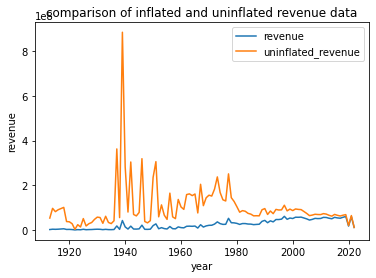

In [194]:
revs.plot(legend='inflated data')
uninf_revs.plot(legend='uninflated data')
plt.title("comparison of inflated and uninflated revenue data")
plt.xlabel("year")
plt.ylabel("revenue")

# we can see that the results with this approach does not make much sense on the first sight, so it definitely needs further exploration before using it in the analysis

### 2. Sentiment Analysis

In [195]:
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

#### 2.1 General Sentiment

In [196]:
from textblob import TextBlob

imdb_data["general_sentiment"] = imdb_data["plot"].apply(lambda x: TextBlob(str(x)).sentiment)

#### 2.2 Emotions

Explanation of code/purpose

In [197]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 6.0 MB/s 
     |████████████████████████████████| 182 kB 60.2 MB/s 
     |████████████████████████████████| 7.6 MB 39.0 MB/s 


In [198]:
from transformers import pipeline
classifier1 = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion", return_all_scores=True) 
classifier2 = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True) 
classifier3 = pipeline("text-classification", model="joeddav/distilbert-base-uncased-go-emotions-student", return_all_scores=True) 

# bhadresh-savani/distilbert-base-uncased-emotion # Very good model trained on Twitter emotion [anger 🤬, disgust 🤢, fear 😨, joy 😀, sadness 😭, surprise 😲]
# j-hartmann/emotion-english-distilroberta-base   # Trained on 6 different datasets. Similar to above one, but has neutral emotion [+ neutral 😐]
# joeddav/distilbert-base-uncased-go-emotions-student # 

# All models have input limitation (512-514 words)

Downloading:   0%|          | 0.00/768 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/text_classification.py:92: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  UserWarning,


Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/294 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/421 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [210]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
LENGTH_CHUNKS= 512
imdb_data = pd.read_csv(data_folder+imdb_data_sample_fn)

imdb_data2= imdb_data.copy()
imdb_data2.drop(columns=imdb_data.columns[0], axis=1, inplace=True)

In [211]:
imdb_data2.head(2)

,imdb_id,title,rating,votes,genres,plot_outline,plot,synopsis,certs
0,tt0135453,The One-Man Band,7.0,2330,"['Short', 'Comedy']","Ladies and gentlemen, tonight for your enterta...",['A band-leader assembles an orchestra by myst...,NaN,"['Norway:A::(recommended rating)', 'United Kin..."
1,tt0000304,Grandma's Reading Glass,6.1,1195,"['Short', 'Family']",Demonstrating the brand-new technique of close...,['A boy looks through glasses at various objec...,NaN,"['Norway:A::(recommended rating)', 'United Kin..."


In [212]:
#function to make chunks of length n words from a plot text
def chunk_text(text, n):
    words=text.split()
    for i in range(0, len(text), n):
        yield text[i:i + n]

#function that regroups words from list into text
def chunks_list(text,n):
    chuncked_text = list(chunk_text(text, n))
    chuncked_text= ["".join(word) for word in chuncked_text]
    return chuncked_text


In [213]:
imdb_data2['chuncked_plot']= imdb_data2['plot'].apply(lambda x: chunks_list(str(x),LENGTH_CHUNKS))
movies_emotions= imdb_data2[['imdb_id','title','plot','chuncked_plot']]
movies_emotions.head(3)

,imdb_id,title,plot,chuncked_plot
0,tt0135453,The One-Man Band,['A band-leader assembles an orchestra by myst...,[['A band-leader assembles an orchestra by mys...
1,tt0000304,Grandma's Reading Glass,['A boy looks through glasses at various objec...,[['A boy looks through glasses at various obje...
2,tt0000300,The Enchanted Drawing,['A cartoonist defies reality when he draws ob...,[['A cartoonist defies reality when he draws o...


In [214]:
# Classifier 1
# function that generates emotions for each chunk of the plot
def emotions_per_chunk(chunk_list):
    emotions_list=[]
    for i in range(len(chunk_list)):
        outcome1_0 = classifier1(chunk_list[i])[0]
        emotions_list+=outcome1_0
    return emotions_list
  

In the following code, we calculate the execution time of classifier 1, on a test set of size 250 movies. The purpose behind this is to verify the implementation of our code, and in the next step of the project we will verify its scalability.



In [215]:
%%time 
test_df= movies_emotions.iloc[:250]
test_df['emotions_per_chunk']= test_df['chuncked_plot'].apply(lambda x: emotions_per_chunk(x) )

CPU times: user 43.8 s, sys: 414 ms, total: 44.2 s
Wall time: 44.9 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [216]:
test_df.head(3)

,imdb_id,title,plot,chuncked_plot,emotions_per_chunk
0,tt0135453,The One-Man Band,['A band-leader assembles an orchestra by myst...,[['A band-leader assembles an orchestra by mys...,"[{'label': 'sadness', 'score': 0.0022695765364..."
1,tt0000304,Grandma's Reading Glass,['A boy looks through glasses at various objec...,[['A boy looks through glasses at various obje...,"[{'label': 'sadness', 'score': 0.0019524201052..."
2,tt0000300,The Enchanted Drawing,['A cartoonist defies reality when he draws ob...,[['A cartoonist defies reality when he draws o...,"[{'label': 'sadness', 'score': 0.0029029797296..."


In [217]:
#Compute averaged emotions scores for each movie plot, from the emotions generated for each chunk.
#Return list of emotions for each movie plot and the emotions labels (happiness, sadness, etc..)

def emotions_avg(movies_emotions):
    emotions_list=[]
    emotions_df= pd.DataFrame(movies_emotions[0])

    emotions_df=emotions_df.groupby(['label']).mean()
    emotions_df.reset_index(inplace=True)
    labels= list(emotions_df.label.values)

    for i in range(len(movies_emotions)):
        # convert list of emotions for each chunk
        emotions_df= pd.DataFrame(movies_emotions[i])

        # calculate the mean of emotions across different chunks
        emotions_df=emotions_df.groupby(['label']).mean()
        emotions_df.reset_index(inplace=True)

        # transpose dataframe for concatenation
        emotions_df= emotions_df.transpose()
        emotions_df.rename(columns=emotions_df.iloc[0], inplace= True)
        emotions_df= emotions_df.iloc[1:]
        emotions_list.append(emotions_df.iloc[0].tolist())
          
    return emotions_list, labels


In [218]:
scores, labels= emotions_avg(test_df['emotions_per_chunk'])
labels

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [219]:
all_emotions_df= pd.DataFrame(scores, columns=labels)
movies_emotions_df=pd.concat([test_df,all_emotions_df], axis=1).drop(columns=['chuncked_plot','emotions_per_chunk'])
movies_emotions_df.head(5)

,imdb_id,title,plot,anger,fear,joy,love,sadness,surprise
0,tt0135453,The One-Man Band,['A band-leader assembles an orchestra by myst...,0.067110,0.047934,0.822748,0.002332,0.006536,0.053341
1,tt0000304,Grandma's Reading Glass,['A boy looks through glasses at various objec...,0.270973,0.108990,0.474012,0.129156,0.012555,0.004313
2,tt0000300,The Enchanted Drawing,['A cartoonist defies reality when he draws ob...,0.010564,0.006028,0.977564,0.000736,0.001751,0.003357
3,tt0132251,Joan of Arc,['A divinely inspired peasant woman becomes an...,0.234275,0.002571,0.753787,0.001643,0.006559,0.001165
4,tt0291476,Sherlock Holmes Baffled,['Sherlock Holmes enters his drawing room to f...,0.075241,0.817232,0.007885,0.001111,0.003757,0.094773


Future steps: Classifier 2 and 3 execution time for generating the emotions 
need to be compared on the test set. 
This will be done as part of the future steps of the project.

#### 2.3 Violence

In [223]:
# Preparing plots data
stemmer = nltk.stem.PorterStemmer()
stopwords = nltk.corpus.stopwords.words("english")
# Delete punctuation letters
imdb_data = imdb_data[imdb_data["plot"].notna()]
imdb_data["tokenized_plot_summary"] = imdb_data["plot"]\
    .apply(lambda text: "".join([ch for ch in text if ch not in string.punctuation]).strip())
# Toknize plot summaries
imdb_data["tokenized_plot_summary"] = imdb_data["tokenized_plot_summary"]\
    .apply(lambda text: nltk.word_tokenize(text))
# Delete stopwords, lower and stem
imdb_data["tokenized_plot_summary"] = imdb_data["tokenized_plot_summary"]\
    .apply(lambda tokens: [stemmer.stem(word.lower()) for word in tokens if word not in stopwords])

In [224]:
# Grievance Dictionary
url_dict = "https://drive.google.com/u/0/uc?id=12bVHlbN56X9X2Qz3OjVJk5aJZVvyYc2q&export=download"
output_dict = "dictionary_7plus.csv"
gdown.download(url_dict, output_dict)

df_grievance_dictionary = pd.read_csv("dictionary_7plus.csv")
df_grievance_dictionary.head(5)

Downloading...
From: https://drive.google.com/u/0/uc?id=12bVHlbN56X9X2Qz3OjVJk5aJZVvyYc2q&export=download
To: /content/dictionary_7plus.csv
100%|██████████| 143k/143k [00:00<00:00, 56.6MB/s]


,Unnamed: 0,category,word,mean_rating
0,1,deadline,accomplish,8.777778
1,2,deadline,action,7.600000
2,3,deadline,anxieti,7.823529
3,4,deadline,anxious,8.315789
4,5,deadline,approach,7.625000


In [225]:
## Grievance Dictionary description
# How many entries
print("Number of grievance dictionary entries: ")
display(df_grievance_dictionary.shape)
# Words
print("Number of grievance dictionary unique words: ")
display(df_grievance_dictionary["word"].nunique())
# Categories
print("Number of grievance dictionary categories: ")
df_grievance_dictionary["category"].nunique()
print("Grievance dictionary categories: ")
display(df_grievance_dictionary["category"].unique())

Number of grievance dictionary entries: 


(3633, 4)

Number of grievance dictionary unique words: 


2479

Number of grievance dictionary categories: 
Grievance dictionary categories: 


array(['deadline', 'desperation', 'fixation', 'frustration', 'god',
       'grievance', 'hate', 'help', 'honour', 'impostor', 'jealousy',
       'loneliness', 'murder', 'paranoia', 'planning', 'relationship',
       'soldier', 'suicide', 'surveillance', 'threat', 'violence',
       'weaponry'], dtype=object)

In [226]:
# Choosing the right for our needs categories
df_grievance_relevant = df_grievance_dictionary[df_grievance_dictionary["category"]\
                                                .isin(['frustration', 'grievance', 'hate', 'murder', 'paranoia', 'threat', 'violence', 'soldier', 'suicide', 'weaponry'])]

In [227]:
# Normalizing the mean fit into category rating
def min_max_norm_plusone(df):
  min = df.min()
  max = df.max()
  return df.apply(lambda x: (x-min)/(max-min)+1)

df_grievance_relevant["norm_mean_rating"] = min_max_norm_plusone(df_grievance_relevant.loc[:, "mean_rating"])
df_grievance_relevant["norm_mean_rating"].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


303    1.132903
304    1.698925
305    1.407258
306    1.542742
307    1.809476
Name: norm_mean_rating, dtype: float64

In [228]:
# Function which measures general violence
def general_violence(tokenized_plot, grievance_dictionary):
  violence_score = 0
  for word in grievance_dictionary["word"].unique():
    if word in tokenized_plot:
      violence_score += grievance_dictionary[grievance_dictionary["word"] == word]["mean_rating"].mean()
  return violence_score

imdb_data["violence_score"] = imdb_data["tokenized_plot_summary"].apply(lambda x: general_violence(x, df_grievance_relevant))
imdb_data["violence_score"].head(5)

0     22.559814
1     25.112195
2      8.500000
3    106.706794
4     57.645985
Name: violence_score, dtype: float64

In [229]:
# Function which inferes top-k manifestation of violence
def violence_manifestation(tokenized_plot, grievance_dictionary, k):
  violent_words = dict()
  for word in grievance_dictionary["word"].unique():
    if word in tokenized_plot:
      violent_words[word] = grievance_dictionary[grievance_dictionary["word"] == word]["mean_rating"].mean()
  sorted_violent_words = sorted(violent_words.items(), key=lambda x: x[1], reverse = True)
  return list(sorted_violent_words)[:k]

imdb_data["violence_manifestations"] = imdb_data["tokenized_plot_summary"].apply(lambda x: violence_manifestation(x, df_grievance_relevant, 3))
imdb_data["violence_manifestations"].head(5)

0    [(instrument, 7.71428571428571), (watch, 7.512...
1    [(extrem, 8.955555555555556), (shot, 8.6444444...
2                                    [(american, 8.5)]
3    [(armi, 9.445454545454545), (nation, 8.9375), ...
4    [(pistol, 9.208333333333334), (ignor, 8.375), ...
Name: violence_manifestations, dtype: object